# IPL Win Prediction Application

### Import libraries

In [430]:
import numpy as np
import pandas as pd


### Import Dataset

In [431]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

### Understanding Dataset

In [432]:
match.head()

id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [433]:
match.shape


(756, 18)

In [434]:
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [435]:
delivery.shape

(179078, 21)

### Creating a new dataset of total score by each innings of each match

In [436]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [437]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

### Total score of 2 innings

In [438]:
total_score_df

match_id  inning  total_runs
0            1       1         207
1            1       2         172
2            2       1         184
3            2       2         187
4            3       1         183
...        ...     ...         ...
1523     11413       2         170
1524     11414       1         155
1525     11414       2         162
1526     11415       1         152
1527     11415       2         157

[1528 rows x 3 columns]

### Filtering only the score of Innings 1

In [439]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [440]:
total_score_df

match_id  inning  total_runs
0            1       1         207
2            2       1         184
4            3       1         183
6            4       1         163
8            5       1         157
...        ...     ...         ...
1518     11347       1         143
1520     11412       1         136
1522     11413       1         171
1524     11414       1         155
1526     11415       1         152

[756 rows x 3 columns]

### Merge delivery data with match to obtain respective team and score in first innings

In [441]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on ='id',right_on ='match_id')

In [442]:
match_df

id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
751               Mumbai Indians               Mumbai Indians         field   
752               Mumbai Indians          Chennai Super Kings           bat   
753               Delhi Capitals               Delhi Capitals         field   
754          Chennai Super Kings          Chennai Super Kings         field   
755          Chennai Super Kings               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
751  normal           0               Mumbai Indians            0   
752  normal           0               Mumbai Indians            0   
753  normal           0               Delhi Capitals            0   
754  normal           0          Chennai Super Kings            0   
755  normal           0               Mumbai Indians            1   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
751               9       HH Pandya   
752               6        AS Yadav   
753               2         RR Pant   
754               6    F du Plessis   
755               0       JJ Bumrah   

                                         venue         umpire1  \
0    Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1      Maharashtra Cricket Association Stadium  A Nand Kishore   
2       Saurashtra Cricket Association Stadium     Nitin Menon   
3                       Holkar Cricket Stadium    AK Chaudhary   
4                        M Chinnaswamy Stadium             NaN   
..                                         ...             ...   
751                           Wankhede Stadium   Nanda Kishore   
752                  M. A. Chidambaram Stadium     Nigel Llong   
753                           ACA-VDCA Stadium             NaN   
754                           ACA-VDCA Stadium   Sundaram Ravi   
755         Rajiv Gandhi Intl. Cricket Stadium     Nitin Menon   

       

### Pre processing (Remove non playing teams)

In [443]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Creating list of those team plays now

In [444]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

### Replacing teams changed their names

In [445]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

### Keep match details of only above playing 8 teams

In [446]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [447]:
match_df.shape

(641, 20)

In [448]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

### Removing match inturrupted by rain  

In [449]:
match_df = match_df[match_df['dl_applied']==0]

In [450]:
match_df

id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
6        7  IPL-2017         Mumbai  09-04-2017        Kolkata Knight Riders   
7        8  IPL-2017         Indore  10-04-2017  Royal Challengers Bangalore   
9       10  IPL-2017         Mumbai  12-04-2017          Sunrisers Hyderabad   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4                 Delhi Capitals  Royal Challengers Bangalore           bat   
6                 Mumbai Indians               Mumbai Indians         field   
7                Kings XI Punjab  Royal Challengers Bangalore           bat   
9                 Mumbai Indians               Mumbai Indians         field   
..                           ...                          ...           ...   
751               Mumbai Indians               Mumbai Indians         field   
752               Mumbai Indians          Chennai Super Kings           bat   
753               Delhi Capitals               Delhi Capitals         field   
754          Chennai Super Kings          Chennai Super Kings         field   
755          Chennai Super Kings               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
4    normal           0  Royal Challengers Bangalore           15   
6    normal           0               Mumbai Indians            0   
7    normal           0              Kings XI Punjab            0   
9    normal           0               Mumbai Indians            0   
..      ...         ...                          ...          ...   
751  normal           0               Mumbai Indians            0   
752  normal           0               Mumbai Indians            0   
753  normal           0               Delhi Capitals            0   
754  normal           0          Chennai Super Kings            0   
755  normal           0               Mumbai Indians            1   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
4                 0       KM Jadhav   
6                 4          N Rana   
7                 8        AR Patel   
9                 4       JJ Bumrah   
..              ...             ...   
751               9       HH Pandya   
752               6        AS Yadav   
753               2         RR Pant   
754               6    F du Plessis   
755               0       JJ Bumrah   

                                         venue        umpire1         umpire2  \
0    Rajiv Gandhi International Stadium, Uppal    AY Dandekar        NJ Llong   
4                        M Chinnaswamy Stadium            NaN             NaN   
6                             Wankhede Stadium    Nitin Menon       CK Nandan   
7                       Holkar Cricket Stadium   AK Chaudhary   C Shamshuddin   
9                             Wankhede Stadium    Nitin Menon       CK Nandan   
..                                         ...            ...             ...   
751                           Wankhede Stadium  Nanda Kishore        O Nandan   
752                  M. A. Chidambaram Stadium    Nigel Llong     Nitin Menon   
753                           ACA-VDCA Stadium            NaN          

In [451]:
match_df.shape

(626, 20)

In [452]:
match_df = match_df[['match_id','city','winner','total_runs']]

### Merging all details of each ball

In [453]:
delivery_df = match_df.merge(delivery,on= 'match_id')

In [454]:
delivery_df


match_id       city               winner  total_runs_x  inning  \
0              1  Hyderabad  Sunrisers Hyderabad           207       1   
1              1  Hyderabad  Sunrisers Hyderabad           207       1   
2              1  Hyderabad  Sunrisers Hyderabad           207       1   
3              1  Hyderabad  Sunrisers Hyderabad           207       1   
4              1  Hyderabad  Sunrisers Hyderabad           207       1   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

               batting_team                 bowling_team  over  ball  \
0       Sunrisers Hyderabad  Royal Challengers Bangalore     1     1   
1       Sunrisers Hyderabad  Royal Challengers Bangalore     1     2   
2       Sunrisers Hyderabad  Royal Challengers Bangalore     1     3   
3       Sunrisers Hyderabad  Royal Challengers Bangalore     1     4   
4       Sunrisers Hyderabad  Royal Challengers Bangalore     1     5   
...                     ...                          ...   ...   ...   
149573  Chennai Super Kings               Mumbai Indians    20     2   
149574  Chennai Super Kings               Mumbai Indians    20     3   
149575  Chennai Super Kings               Mumbai Indians    20     4   
149576  Chennai Super Kings               Mumbai Indians    20     5   
149577  Chennai Super Kings               Mumbai Indians    20     6   

          batsman  ... bye_runs legbye_runs  noball_runs  penalty_runs  \
0       DA Warner  ...        0           0            0             0   
1       DA Warner  ...        0           0            0             0   
2       DA Warner  ...        0           0            0             0   
3       DA Warner  ...        0           0            0             0   
4       DA Warner  ...        0           0            0             0   
...           ...  ...      ...         ...          ...           ...   
149573  RA Jadeja  ...        0           0            0             0   
149574  SR Watson  ...        0           0            0             0   
149575  SR Watson  ...        0           0            0             0   
149576  SN Thakur  ...        0           0            0             0   
149577  SN Thakur  ...        0           0            0             0   

        batsman_runs  extra_runs  total_runs_y  player_dismissed  \
0                  0           0             0               NaN   
1                  0           0             0               NaN   
2                  4           0             4               NaN   
3                  0           0             0               NaN   
4                  0           2             2               NaN   
...              ...         ...           ...               ...   
149573             1           0             1               NaN   
149574             2           0             2               NaN   
149575             1           0             1         SR Watson   
149576             2           0             2               NaN   
149577             0           0             0         SN Thakur   

        dismissal_kind    fielder  
0                  NaN        NaN  
1                  NaN        NaN  
2                  NaN        NaN  
3                  NaN        NaN  
4                  NaN        NaN  
...                ...        ...  
149573             NaN        NaN  
149574             NaN        NaN  
149575         run out  KH Pandya  
149576             NaN        NaN  
149577             lbw        NaN  

[149578 rows x 24 columns]

In [455]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [456]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... bye_runs legbye_runs  noball_runs  penalty_runs  \
125          CH Gayle  ...        0           0            0             0   
126     Mandeep Singh  ...        0           0            0             0   
127     Mandeep Singh  ...        0           0            0             0   
128     Mandeep Singh  ...        0           0            0             0   
129     Mandeep Singh  ...        0           0            0             0   
...               ...  ...      ...         ...          ...           ...   
149573      RA Jadeja  ...        0           0            0             0   
149574      SR Watson  ...        0           0            0             0   
149575      SR Watson  ...        0           0            0             0   
149576      SN Thakur  ...        0           0            0             0   
149577      SN Thakur  ...        0           0            0             0   

        batsman_runs  extra_runs  total_runs_y  player_dismissed  \
125                1           0             1               NaN   
126                0           0             0               NaN   
127                0           0             0               NaN   
128                2           0             2               NaN   
129                4           0             4               NaN   
...              ...         ...           ...               ...   
149573             1           0             1               NaN   
149574             2           0             2               NaN   
149575             1           0             1         SR Watson   
149576             2           0             2               NaN   
149577             0           0             0         SN Thakur   

        dismissal_kind    fielder  
125                NaN        NaN  
126                NaN        NaN  
127                NaN        NaN  
128                NaN        NaN  
129                NaN        NaN  
...                ...        ...  
149573             NaN        NaN  
149574             NaN        NaN  
149575         run out  KH Pandya  
149576             NaN        NaN  
149577             lbw        NaN  

[72413 rows x 24 columns]

In [457]:
delivery_df.shape

(72413, 24)

### Score after each ball

In [458]:
delivery_df.groupby('match_id').cumsum()['total_runs_y']

125         1
126         1
127         1
128         3
129         7
         ... 
149573    152
149574    154
149575    155
149576    157
149577    157
Name: total_runs_y, Length: 72413, dtype: int64

In [459]:
delivery_df['current_score']= delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-459-2fd7eb13a13f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score']= delivery_df.groupby('match_id').cumsum()['total_runs_y']


### Runs left after each ball


In [460]:
delivery_df['total_runs_x']-delivery_df['current_score']

125       206
126       206
127       206
128       204
129       200
         ... 
149573      0
149574     -2
149575     -3
149576     -5
149577     -5
Length: 72413, dtype: int64

In [461]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

<ipython-input-461-92172d964bc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']


In [462]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... noball_runs penalty_runs  batsman_runs  extra_runs  \
125          CH Gayle  ...           0            0             1           0   
126     Mandeep Singh  ...           0            0             0           0   
127     Mandeep Singh  ...           0            0             0           0   
128     Mandeep Singh  ...           0            0             2           0   
129     Mandeep Singh  ...           0            0             4           0   
...               ...  ...         ...          ...           ...         ...   
149573      RA Jadeja  ...           0            0             1           0   
149574      SR Watson  ...           0            0             2           0   
149575      SR Watson  ...           0            0             1           0   
149576      SN Thakur  ...           0            0             2           0   
149577      SN Thakur  ...           0            0             0           0   

        total_runs_y  player_dismissed  dismissal_kind    fielder  \
125                1               NaN             NaN        NaN   
126                0               NaN             NaN        NaN   
127                0               NaN             NaN        NaN   
128                2               NaN             NaN        NaN   
129                4               NaN             NaN        NaN   
...              ...               ...             ...        ...   
149573             1               NaN             NaN        NaN   
149574             2               NaN             NaN        NaN   
149575             1         SR Watson         run out  KH Pandya   
149576             2               NaN             NaN        NaN   
149577             0         SN Thakur             lbw        NaN   

        current_score  runs_left  
125                 1        206  
126                 1        206  
127                 1        206  
128                 3        204  
129                 7        200  
...               ...        ...  
149573            152          0  
149574            154         -2  
149575            155         -3  
149576            157         -5  
149577            157         -5  

[72413 rows x 26 columns]

### Balls left 

In [463]:
 126 - (delivery_df['over']*6 + delivery_df['ball'])

125       119
126       118
127       117
128       116
129       115
         ... 
149573      4
149574      3
149575      2
149576      1
149577      0
Length: 72413, dtype: int64

In [464]:
 delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

<ipython-input-464-7447ac93ecae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [465]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... penalty_runs batsman_runs  extra_runs  \
125          CH Gayle  ...            0            1           0   
126     Mandeep Singh  ...            0            0           0   
127     Mandeep Singh  ...            0            0           0   
128     Mandeep Singh  ...            0            2           0   
129     Mandeep Singh  ...            0            4           0   
...               ...  ...          ...          ...         ...   
149573      RA Jadeja  ...            0            1           0   
149574      SR Watson  ...            0            2           0   
149575      SR Watson  ...            0            1           0   
149576      SN Thakur  ...            0            2           0   
149577      SN Thakur  ...            0            0           0   

        total_runs_y  player_dismissed  dismissal_kind    fielder  \
125                1               NaN             NaN        NaN   
126                0               NaN             NaN        NaN   
127                0               NaN             NaN        NaN   
128                2               NaN             NaN        NaN   
129                4               NaN             NaN        NaN   
...              ...               ...             ...        ...   
149573             1               NaN             NaN        NaN   
149574             2               NaN             NaN        NaN   
149575             1         SR Watson         run out  KH Pandya   
149576             2               NaN             NaN        NaN   
149577             0         SN Thakur             lbw        NaN   

        current_score  runs_left  balls_left  
125                 1        206         119  
126                 1        206         118  
127                 1        206         117  
128                 3        204         116  
129                 7        200         115  
...               ...        ...         ...  
149573            152          0           4  
149574            154         -2           3  
149575            155         -3           2  
149576            157         -5           1  
149577            157         -5           0  

[72413 rows x 27 columns]

### Wickets left

In [466]:
delivery_df['player_dismissed'] =delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets =delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 -wickets
delivery_df.head()

<ipython-input-466-8a0b983c2885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] =delivery_df['player_dismissed'].fillna("0")
<ipython-input-466-8a0b983c2885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
<ipython-input-466-8a0b983c2885>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 0             NaN      NaN              1        206   
126                 0             NaN      NaN              1        206   
127                 0             NaN      NaN              1        206   
128                 0             NaN      NaN              3        204   
129                 0             NaN      NaN              7        200   

     balls_left  wickets  
125         119       10  
126         118       10  
127         117       10  
128         116       10  
129         115       10  

[5 rows x 28 columns]

In [467]:
delivery_df.head()

match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 0             NaN      NaN              1        206   
126                 0             NaN      NaN              1        206   
127                 0             NaN      NaN              1        206   
128                 0             NaN      NaN              3        204   
129                 0             NaN      NaN              7        200   

     balls_left  wickets  
125         119       10  
126         118       10  
127         117       10  
128         116       10  
129         115       10  

[5 rows x 28 columns]

### Current Run Rtae


In [468]:
# crr = runs/overs
delivery_df['crr'] = delivery_df['current_score']*6/(120-delivery_df['balls_left'])

<ipython-input-468-e9a4fd550816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = delivery_df['current_score']*6/(120-delivery_df['balls_left'])


### Required Run Rate

In [469]:
### rrr = runs_left/overs_left
delivery_df['rrr'] = delivery_df['runs_left']*6/delivery_df['balls_left']

<ipython-input-469-ed2b31e40c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = delivery_df['runs_left']*6/delivery_df['balls_left']


In [470]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           152       2   
149574     11415  Hyderabad       Mumbai Indians           152       2   
149575     11415  Hyderabad       Mumbai Indians           152       2   
149576     11415  Hyderabad       Mumbai Indians           152       2   
149577     11415  Hyderabad       Mumbai Indians           152       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
149573          Chennai Super Kings       Mumbai Indians    20     2   
149574          Chennai Super Kings       Mumbai Indians    20     3   
149575          Chennai Super Kings       Mumbai Indians    20     4   
149576          Chennai Super Kings       Mumbai Indians    20     5   
149577          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... total_runs_y player_dismissed  dismissal_kind  \
125          CH Gayle  ...            1                0             NaN   
126     Mandeep Singh  ...            0                0             NaN   
127     Mandeep Singh  ...            0                0             NaN   
128     Mandeep Singh  ...            2                0             NaN   
129     Mandeep Singh  ...            4                0             NaN   
...               ...  ...          ...              ...             ...   
149573      RA Jadeja  ...            1                0             NaN   
149574      SR Watson  ...            2                0             NaN   
149575      SR Watson  ...            1                1         run out   
149576      SN Thakur  ...            2                0             NaN   
149577      SN Thakur  ...            0                1             lbw   

          fielder  current_score  runs_left  balls_left  wickets       crr  \
125           NaN              1        206         119       10  6.000000   
126           NaN              1        206         118       10  3.000000   
127           NaN              1        206         117       10  2.000000   
128           NaN              3        204         116       10  4.500000   
129           NaN              7        200         115       10  8.400000   
...           ...            ...        ...         ...      ...       ...   
149573        NaN            152          0           4        5  7.862069   
149574        NaN            154         -2           3        5  7.897436   
149575  KH Pandya            155         -3           2        4  7.881356   
149576        NaN            157         -5           1        4  7.915966   
149577        NaN            157         -5           0        3  7.850000   

              rrr  
125     10.386555  
126     10.474576  
127     10.564103  
128     10.551724  
129     10.434783  
...           ...  
149573   0.000000  
149574  -4.000000  
149575  -9.000000  
149576 -30.000000  
149577       -inf  

[72413 rows x 30 columns]

### Results 0 OR 1

In [471]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [472]:
delivery_df['result']= delivery_df.apply(result, axis = 1)

<ipython-input-472-ccf0e6c68e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result']= delivery_df.apply(result, axis = 1)


### Converting Dataset to required form

In [473]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [474]:
final_df

batting_team         bowling_team       city  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad  Hyderabad   
126     Royal Challengers Bangalore  Sunrisers Hyderabad  Hyderabad   
127     Royal Challengers Bangalore  Sunrisers Hyderabad  Hyderabad   
128     Royal Challengers Bangalore  Sunrisers Hyderabad  Hyderabad   
129     Royal Challengers Bangalore  Sunrisers Hyderabad  Hyderabad   
...                             ...                  ...        ...   
149573          Chennai Super Kings       Mumbai Indians  Hyderabad   
149574          Chennai Super Kings       Mumbai Indians  Hyderabad   
149575          Chennai Super Kings       Mumbai Indians  Hyderabad   
149576          Chennai Super Kings       Mumbai Indians  Hyderabad   
149577          Chennai Super Kings       Mumbai Indians  Hyderabad   

        runs_left  balls_left  wickets  total_runs_x       crr        rrr  \
125           206         119       10           207  6.000000  10.386555   
126           206         118       10           207  3.000000  10.474576   
127           206         117       10           207  2.000000  10.564103   
128           204         116       10           207  4.500000  10.551724   
129           200         115       10           207  8.400000  10.434783   
...           ...         ...      ...           ...       ...        ...   
149573          0           4        5           152  7.862069   0.000000   
149574         -2           3        5           152  7.897436  -4.000000   
149575         -3           2        4           152  7.881356  -9.000000   
149576         -5           1        4           152  7.915966 -30.000000   
149577         -5           0        3           152  7.850000       -inf   

        result  
125          0  
126          0  
127          0  
128          0  
129          0  
...        ...  
149573       0  
149574       0  
149575       0  
149576       0  
149577       0  

[72413 rows x 10 columns]

### Randomize the dataset

In [475]:
final_df =  final_df.sample(final_df.shape[0])

In [476]:
final_df.sample()

batting_team                 bowling_team       city  \
102677  Sunrisers Hyderabad  Royal Challengers Bangalore  Bangalore   

        runs_left  balls_left  wickets  total_runs_x       crr       rrr  \
102677         35          33        8           166  9.034483  6.363636   

        result  
102677       1

In [477]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [478]:
final_df.dropna(inplace= True)


In [479]:
final_df = final_df[final_df['balls_left'] != 0]

### Splitting Model into Train and Test Data

In [480]:
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state =1)

In [481]:
X_train

batting_team                 bowling_team        city  \
88199               Kings XI Punjab             Rajasthan Royals     Sharjah   
78307           Chennai Super Kings          Sunrisers Hyderabad     Chennai   
86769                Mumbai Indians        Kolkata Knight Riders   Abu Dhabi   
91026         Kolkata Knight Riders             Rajasthan Royals   Abu Dhabi   
6037          Kolkata Knight Riders              Kings XI Punjab  Chandigarh   
...                             ...                          ...         ...   
32783               Deccan Chargers             Delhi Daredevils   Centurion   
15716                Mumbai Indians          Chennai Super Kings      Mumbai   
40498               Deccan Chargers        Kolkata Knight Riders     Kolkata   
102606          Sunrisers Hyderabad  Royal Challengers Bangalore   Bangalore   
109134  Royal Challengers Bangalore          Chennai Super Kings     Chennai   

        runs_left  balls_left  wickets  total_runs_x        crr        rrr  
88199         131          72        8           191   7.500000  10.916667  
78307          57          37        7           159   7.373494   9.243243  
86769         106          58        8           163   5.516129  10.965517  
91026          86          53        8           152   5.910448   9.735849  
6037           70          42        7           167   7.461538  10.000000  
...           ...         ...      ...           ...        ...        ...  
32783          56          68        8           153  11.192308   4.941176  
15716          29          44        9           156  10.026316   3.954545  
40498         181         119       10           181   0.000000   9.126050  
102606        125         101       10           166  12.947368   7.425743  
109134        144         114       10           148   4.000000   7.578947  

[57073 rows x 9 columns]

### Appying OneHotEncoder on String values

In [482]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder = 'passthrough')

### Aplying PipeLine & Logistic Regression 

In [497]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


### Transform, Fit the Model

In [498]:
##Logistic Regression 
pipe  = Pipeline(steps = [
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [499]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [500]:
X_train.describe()

runs_left    balls_left       wickets  total_runs_x           crr  \
count  57073.000000  57073.000000  57073.000000  57073.000000  57073.000000   
mean      92.523207     62.798153      7.555149    165.715610      7.446691   
std       50.055277     33.271924      2.117338     29.247181      2.275330   
min      -16.000000     -2.000000      0.000000     65.000000      0.000000   
25%       53.000000     35.000000      6.000000    147.000000      6.272727   
50%       92.000000     63.000000      8.000000    165.000000      7.486726   
75%      130.000000     92.000000      9.000000    185.000000      8.689655   
max      249.000000    119.000000     10.000000    250.000000     42.000000   

                rrr  
count  57073.000000  
mean      10.355903  
std       13.843563  
min     -462.000000  
25%        7.153846  
50%        8.876712  
75%       10.888889  
max      678.000000

In [501]:
Y_pred = pipe.predict(X_test)

In [502]:
Y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

### Accuracy 

In [503]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8034200014016399

In [507]:
pipe.predict_proba(X_test)[1025]



array([0.82946744, 0.17053256])

In [508]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [509]:
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

Target- 207


end_of_over  runs_after_over  wickets_in_over  lose   win
130            1               11                0  88.3  11.7
136            2                1                0  91.5   8.5
142            3               16                0  83.9  16.1
148            4               11                0  78.4  21.6
155            5                5                0  78.9  21.1
162            6               10                1  83.9  16.1
168            7                7                1  89.8  10.2
174            8               13                0  84.5  15.5
180            9               10                0  80.3  19.7
187           10               10                0  75.3  24.7
194           11               16                0  60.9  39.1
201           12                8                1  71.4  28.6
207           13                8                1  80.0  20.0
213           14                4                1  89.4  10.6
219           15                9                0  87.4  12.6
225           16               12                0  82.4  17.6
231           17                3                1  92.1   7.9
237           18                2                2  98.6   1.4
243           19                9                1  99.6   0.4

Text(0.5, 1.0, 'Target-207')

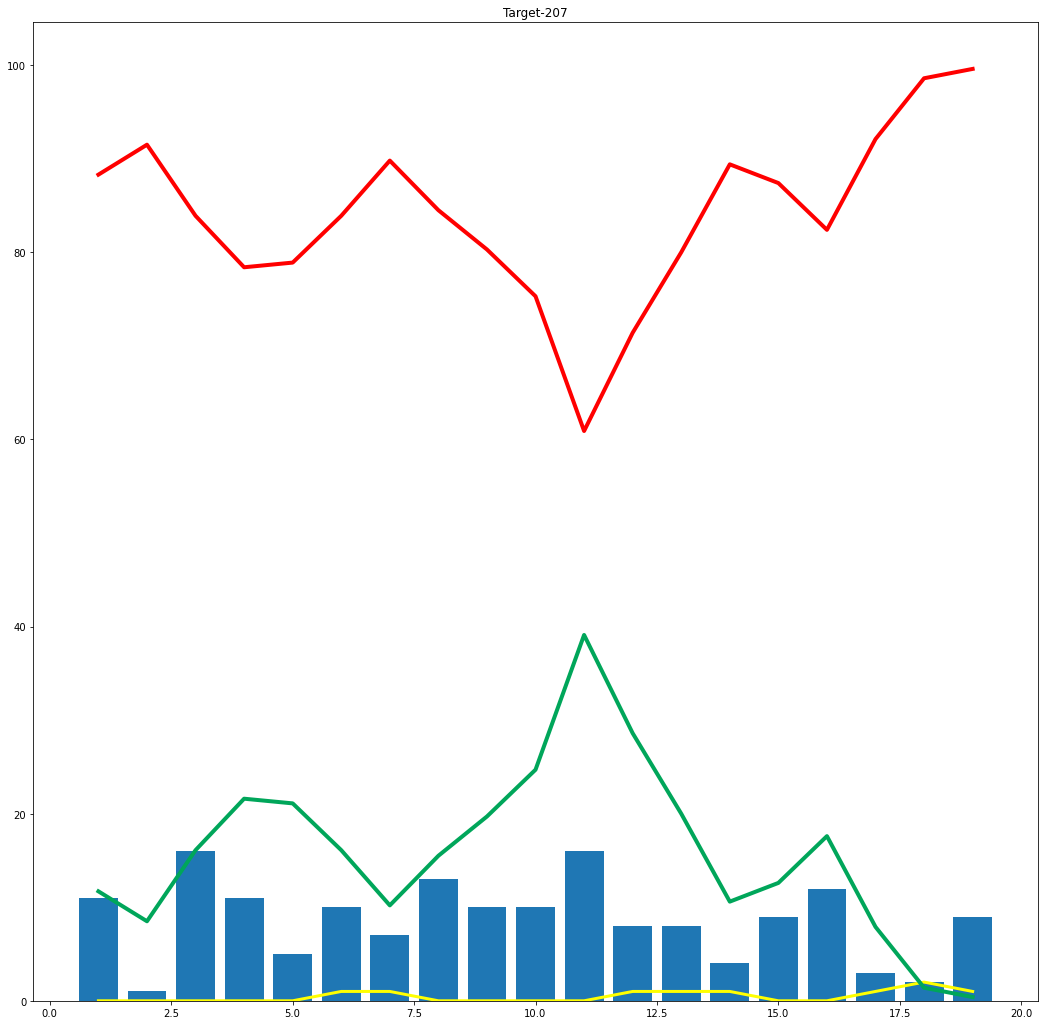

In [510]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [511]:
teams


['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [512]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [514]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))